In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sahko = pd.read_excel('data/kotisahko.xlsx', sheet_name = 'Koottu')
lampo = pd.read_excel('data/lampotilat.xlsx')

In [3]:
lampo.head(5)

,Pvm,Tunti,Ulkolämpötila
0,2018-08-18,00 - 01,17.8
1,2018-08-18,01 - 02,19.0
2,2018-08-18,02 - 03,18.5
3,2018-08-18,03 - 04,18.5
4,2018-08-18,04 - 05,18.6


In [4]:
sahko.head(5)

,Pvm,Tunti,kWh,s/kwh,Maksettavaa s
0,2018-08-18,00 - 01,0.35,6.366532,2.228286
1,2018-08-18,01 - 02,0.87,6.278492,5.462288
2,2018-08-18,02 - 03,0.39,6.114812,2.384777
3,2018-08-18,03 - 04,0.37,6.083812,2.251010
4,2018-08-18,04 - 05,0.38,6.054052,2.300540


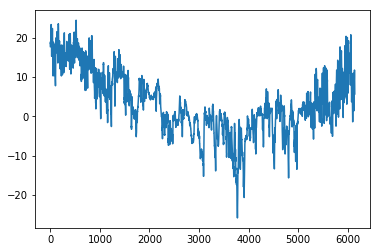

In [5]:
lampo['Ulkolämpötila'].plot()

In [6]:
lampo.index = pd.to_datetime(lampo['Pvm'])

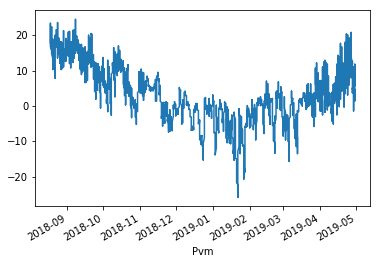

In [7]:
lampo['Ulkolämpötila'].plot()

In [8]:
lampo.shape

(6145, 3)

In [9]:
lampo.isnull().sum()

Pvm              0
Tunti            0
Ulkolämpötila    0
dtype: int64

Jotain käsittämätöntä häiriötä, josta en pääse eroon.. Rajataan näyttämään hetket, jolta dataa oikeasti löytyy. 


    update 23.5 Ongelma löytyi lähdeaineiston päivämäärien useista eri formatointitavoista. Tästä syystä osa päivämääristä formatoitui näyttämään "tulevaisuuteen". Ongelma korjattu suoraan lähdeaineistoon ja enää aikarajausta ei tarvitse, mutta jätän koodinpätkät näkyviin.

In [39]:
aikaraja = (pd.Timestamp('2018-08-18'), pd.Timestamp('2019-05-1')) 

#.plot() perään .set_xlim(aikaraja) niin rajaa aikakauden - toimii lähes kaikkiin kuvioihin.

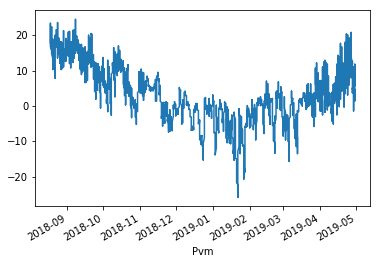

In [24]:
lampo['Ulkolämpötila'].plot()

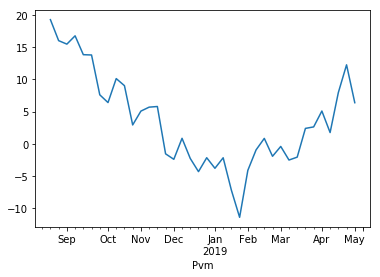

In [26]:
lampo['Ulkolämpötila'].resample('W').mean().plot()

In [13]:
sahko.index = pd.to_datetime(sahko['Pvm'])

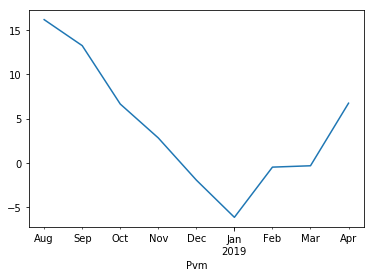

In [27]:
lampo['Ulkolämpötila'].resample('M').mean().plot()

In [15]:
df=sahko
df.Pvm = pd.to_datetime(df.Pvm).dt.month
df=df.drop('Pvm',axis=1)
sähkö = df.resample('D').mean()
sähkö.head()

,kWh,s/kwh,Maksettavaa s
Pvm,,,
2018-08-18,0.787917,6.234885,4.843432
2018-08-19,0.618750,6.029614,3.774839
2018-08-20,0.638750,6.851320,4.281492
2018-08-21,0.679583,7.622445,5.000392
2018-08-22,0.647500,7.463519,4.683567


In [16]:
df1=lampo
df1.Pvm = pd.to_datetime(df1.Pvm).dt.month
df1=df1.drop('Pvm',axis=1)
lämpötila = df1.resample('D').mean()
lämpötila.head()

,Ulkolämpötila
Pvm,
2018-08-18,20.337500
2018-08-19,18.312500
2018-08-20,14.420833
2018-08-21,14.220833
2018-08-22,14.125000


In [33]:
sähkö['s/kwh%'] = sähkö['s/kwh'].pct_change()
lämpötila['Ulkolämpötila%'] = lämpötila['Ulkolämpötila'].pct_change()

In [34]:
muutokset = pd.concat([sähkö['s/kwh%'], lämpötila['Ulkolämpötila%']], axis=1)
muutokset.head()

,s/kwh%,Ulkolämpötila%
Pvm,,
2018-08-18,NaN,NaN
2018-08-19,-0.032923,-0.099570
2018-08-20,0.136278,-0.212514
2018-08-21,0.112551,-0.013869
2018-08-22,-0.020850,-0.006739


In [35]:
muutokset.describe()

,s/kwh%,Ulkolämpötila%
count,255.000000,255.000000
mean,0.011054,0.228633
std,0.162907,3.001166
min,-0.494609,-7.787330
25%,-0.060082,-0.433636
50%,-0.004614,-0.056338
75%,0.061599,0.224592
max,1.206309,31.068966


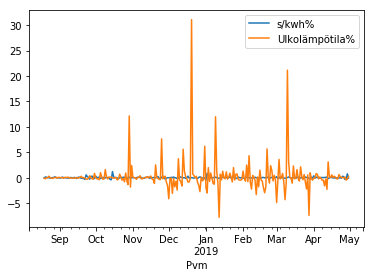

In [36]:
ax1 = muutokset.plot()

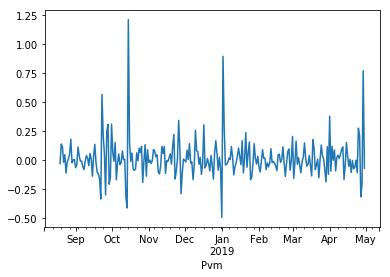

In [38]:
ax2 = sähkö['s/kwh%'].plot()

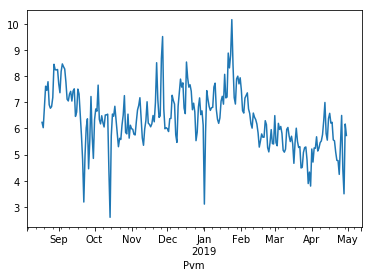

In [28]:
sähkö['s/kwh'].plot()

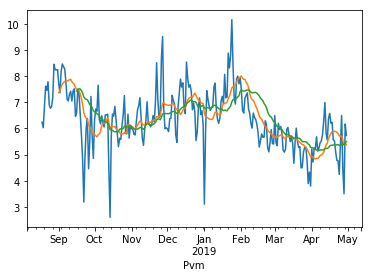

In [29]:
sähkö['s/kwh'].plot()
sähkö['s/kwh'].rolling(15).mean().plot()
sähkö['s/kwh'].rolling(30).mean().plot()

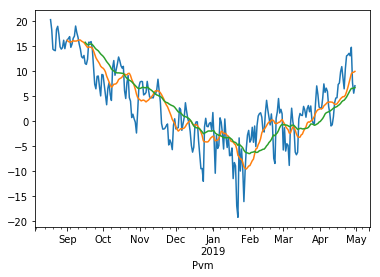

In [31]:
lämpötila['Ulkolämpötila'].plot()
lämpötila['Ulkolämpötila'].rolling(15).mean().plot()
lämpötila['Ulkolämpötila'].rolling(30).mean().plot()

In [74]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: Red' if v else '' for v in is_max]
muutokset[(abs(muutokset['s/kwh%'])>0.5) | 
          (abs(muutokset['s/kwh%'])<-0.5) |
          (abs(muutokset['Ulkolämpötila%'])>5) | 
          (abs(muutokset['Ulkolämpötila%'])<-5)].style.apply(highlight_max)

,s/kwh%,Ulkolämpötila%
Pvm,,
2018-09-23 00:00:00,0.562317,-0.243376
2018-10-15 00:00:00,1.20631,-0.0570318
2018-10-29 00:00:00,0.130774,12.1395
2018-11-25 00:00:00,0.00903109,7.63636
2018-12-13 00:00:00,-0.0388909,5.59211
2018-12-20 00:00:00,0.0120478,31.069
2018-12-31 00:00:00,-0.0823354,6.18333
2019-01-02 00:00:00,0.891303,-3.0021
2019-01-09 00:00:00,0.114695,11.9778


In [79]:
#Sähkönhinnan muutoksia viikonpäivien mukaan
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['s/kwh%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,37.0,0.163482,0.232324,-0.082335,0.051242,0.116372,0.173621,1.206309
1,37.0,0.001062,0.111862,-0.494609,-0.026479,0.012159,0.064739,0.177291
2,36.0,0.020914,0.178872,-0.301030,-0.046514,0.002419,0.071749,0.891303
3,36.0,0.032950,0.106045,-0.120877,-0.037647,0.002761,0.070129,0.272787
4,36.0,-0.014295,0.115798,-0.190393,-0.107238,-0.021650,0.025447,0.305058
5,36.0,-0.107323,0.092986,-0.337585,-0.150083,-0.096074,-0.047888,0.113494
6,37.0,-0.022435,0.130029,-0.414012,-0.043812,-0.021838,0.009271,0.562317


In [84]:
#oman talouden sähkönkulutukset viikonpäivien mukaan
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: tomato' if v else '' for v in is_max]
sähkö['Weekday'] = muutokset.index.weekday

sähkö.groupby('Weekday')['kWh'].describe().style.apply(highlight_max)

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,37,1.7648,0.542759,0.605417,1.52542,1.88125,2.1075,2.65833
1,37,1.7725,0.572021,0.6625,1.56708,1.8204,2.03208,3.17792
2,36,1.81337,0.552031,0.6475,1.53438,1.8475,2.10229,3.045
3,36,1.72103,0.438695,0.6775,1.65042,1.80292,1.9774,2.55208
4,36,1.84436,0.50115,0.5725,1.665,1.94167,2.20885,2.60042
5,37,1.88873,0.549034,0.569583,1.675,1.96917,2.17875,3.11125
6,37,1.79265,0.543148,0.61875,1.50708,1.93667,2.07125,3.07208


In [85]:
muutokset.corr()

,s/kwh%,Ulkolämpötila%,Weekday
s/kwh%,1.000000,0.018768,-0.356295
Ulkolämpötila%,0.018768,1.000000,0.022565
Weekday,-0.356295,0.022565,1.000000


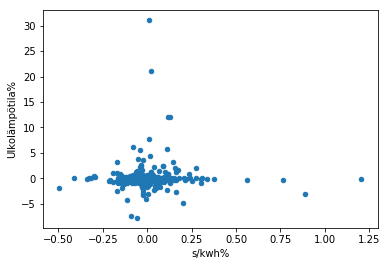

In [86]:
muutokset.plot.scatter(x='s/kwh%', y='Ulkolämpötila%')

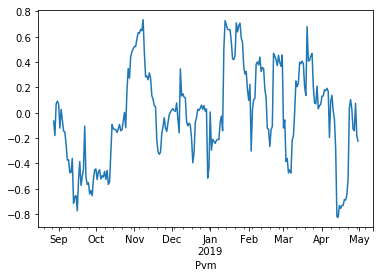

In [115]:
muutokset['s/kwh%'].rolling(10).corr(muutokset['Ulkolämpötila%']).plot()

(-30, 30)

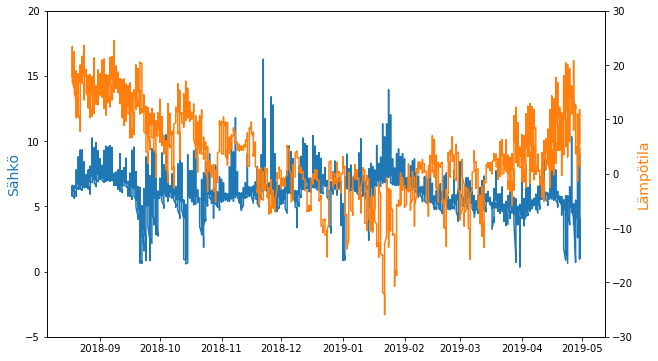

In [121]:
#Tunnittaisesta datasta. n. 6000 pistettä sähköntuntihinnan(pörssihinta) ja ulkolämpötila (Ilmatieteenlaitos) vertailuja.

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_ylabel('Sähkö', color='C0', fontsize=14)
ax.plot(sahko['s/kwh'], color='C0')
ax.set_ylim(-5,20)

ax_T = ax.twinx()

ax_T.set_ylabel('Lämpötila', color='C1', fontsize=14)
ax_T.plot(lampo['Ulkolämpötila'], color='C1')
ax_T.set_ylim(-30,30)

In [93]:
#Testaillaan kuukausittaista tarkastelujaksoa
sähkökuukausi = df.resample('M').mean()
lämpötilakuukausi = df1.resample('M').mean()

In [94]:
sähkökuukausi['s/kwh%'] = sähkökuukausi['s/kwh'].pct_change()
lämpötilakuukausi['Ulkolämpötila%'] = lämpötilakuukausi['Ulkolämpötila'].pct_change()
muutoksetkuukausi = pd.concat([sähkökuukausi['s/kwh%'], lämpötilakuukausi['Ulkolämpötila%']], axis=1)
muutoksetkuukausi.head()

,s/kwh%,Ulkolämpötila%
Pvm,,
2018-08-31,NaN,NaN
2018-09-30,-0.091336,-0.181706
2018-10-31,-0.085965,-0.498789
2018-11-30,0.075840,-0.578001
2018-12-31,0.041786,-1.701877


In [98]:
muutoksetkuukausi.corr()

,s/kwh%,Ulkolämpötila%,Month
s/kwh%,1.000000,-0.241921,0.264913
Ulkolämpötila%,-0.241921,1.000000,0.135505
Month,0.264913,0.135505,1.000000


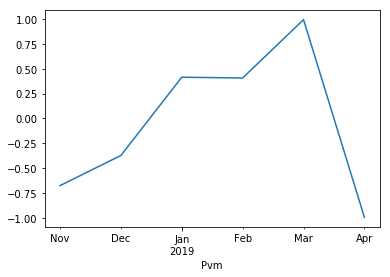

In [107]:
muutoksetkuukausi['s/kwh%'].rolling(3).corr(muutoksetkuukausi['Ulkolämpötila%']).plot()